<a href="https://colab.research.google.com/github/bcataldo3/plantilla_curso_python/blob/main/docs/Clase_09 - PCA - Caso Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA - Caso de Estudio

Ahora, apliquemos el PCA para reducir la dimensionalidad del conjunto de datos MNIST. Utilizaremos la versión comprimida (1,797 imágenes de 8 × 8) proporcionada por scikit-learn, pero ninguna de nuestras consideraciones se verá afectada por esta elección. Comencemos cargando y normalizando el conjunto de datos.

In [1]:
# Importe librerias. load digits contiene la data de las imagenes de numeros
import numpy as np
from sklearn.datasets import load_digits

# Establecemos una semilla para reproducibilidad
np.random.seed(1000)

# cargamos el dataset
digits = load_digits()
X = digits['data'] / np.max(digits['data'])

A partir de la discusión teórica, sabemos que la magnitud de los valores propios de la matriz de covarianza es proporcional a la importancia relativa (es decir, la varianza explicada y, por lo tanto, el contenido informativo) del componente principal correspondiente. Por lo tanto, si se ordenan en orden descendente, es posible calcular las siguientes diferencias:

$\lambda_2-\lambda_1,\lambda_3-\lambda_2,\dotsc,\lambda_n-\lambda_{n-1}$

Como la importancia tiende a disminuir cuando el número de componentes $( k )$ se acerca a $( n )$, podemos seleccionar el $( k )$  óptimo eligiendo la primera mayor diferencia, la cual indica una disminución sustancial en la cantidad de varianza explicada por todos los componentes siguientes. Para comprender mejor este mecanismo, calculemos los valores propios y sus diferencias (como la matriz de covarianza, $ C $, es semidefinida positiva, estamos seguros de que $\lambda_i \geq 0 $ para todo $ i $ en el rango de $1$ a $ n $). Los resultados se pueden ver a continuación

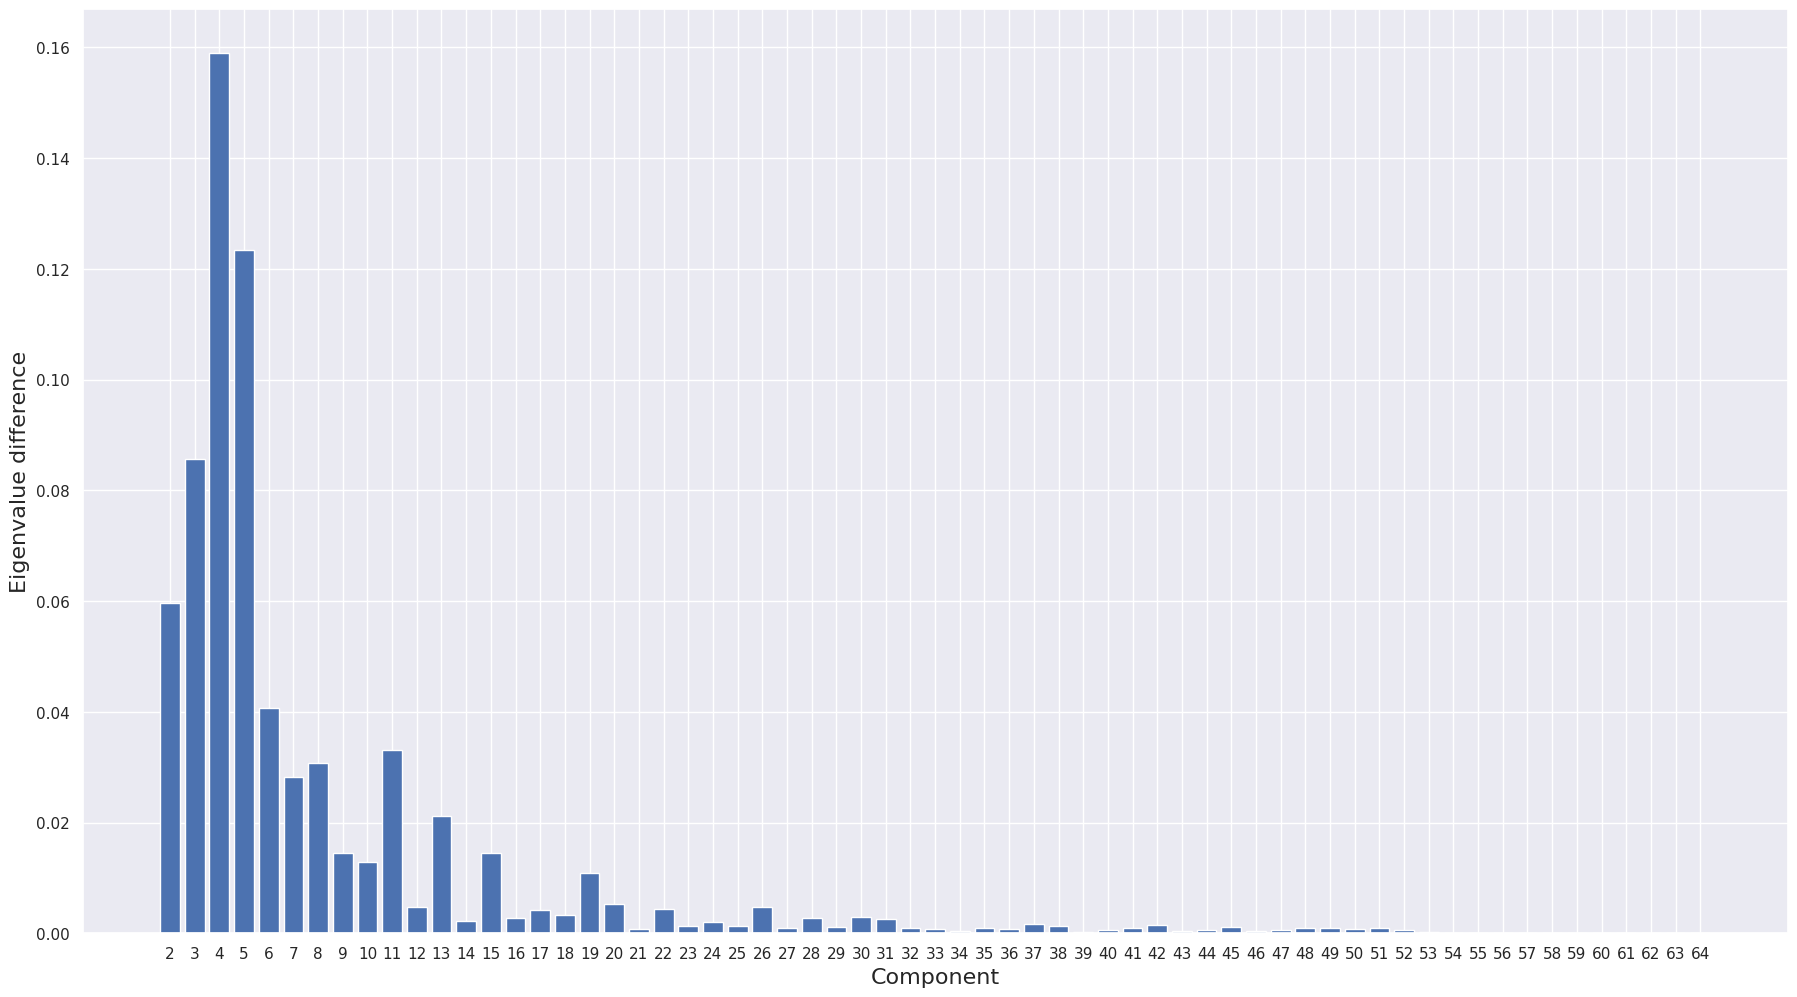

In [2]:
# Importe librerias
import seaborn as sns
import matplotlib.pyplot as plt

# Calculo de valores propios de C
C = np.cov(X.T)
l, v = np.linalg.eig(C)
l = np.sort(l)[::-1]
d = l[:l.shape[0] - 1] - l[1:]

# Mostramos grafico con las diferencias entre valores propios de la matriz C
sns.set()
fig, ax = plt.subplots(figsize=(22, 12))
ax.bar(np.arange(2, len(d) + 2, 1), d)
ax.set_xticks(np.arange(2, len(d) + 2, 1))
ax.set_xlabel('Component', fontsize=16)
ax.set_ylabel('Eigenvalue difference', fontsize=16)
plt.show()

Como se puede observar, las diferencias para los primeros componentes principales son muy grandes, alcanzando un máximo en correspondencia con el cuarto componente principal ($ \lambda_4 - \lambda_3 $); sin embargo, la siguiente diferencia sigue siendo muy alta, mientras que hay una caída abrupta correspondiente a $ \lambda_6 $. En este punto, la tendencia es casi estable (excepto por algunas oscilaciones residuales) hasta $ \lambda_{11} $, y luego comienza a disminuir muy rápidamente, tendiendo hacia cero. Dado que aún deseamos tener imágenes cuadradas, vamos a elegir $ k = 16 $ (lo que equivale a dividir cada lado por cuatro). En otro escenario, podrías elegir, por ejemplo, $ k = 15 $, o incluso $ k = 8 $; sin embargo, para tener una mejor comprensión del error inducido por la reducción de dimensionalidad, será útil analizar también la varianza explicada. Comenzamos el análisis de componentes principales con ``n_components=16``

In [3]:
# Importe PCA
from sklearn.decomposition import PCA

# Calculo de PCA con 16 componentes
pca = PCA(n_components=16, random_state=1000)
digits_pca = pca.fit_transform(X)

El array ``digits_pca`` se obtiene después de ajustar el modelo y proyectar todas las muestras sobre el subespacio correspondiente a los primeros 16 componentes principales. Si queremos comparar las imágenes originales con sus reconstrucciones, necesitamos invocar el método ``inverse_transform()``, que realiza la proyección de vuelta al espacio original. Por lo tanto, si el PCA es, en este caso, una transformación, $ f(x): \mathbb{R}^{64} \rightarrow \mathbb{R}^{16} $, la transformación inversa es $ g(z): \mathbb{R}^{16} \rightarrow \mathbb{R}^{64} $. La comparación entre los primeros 10 dígitos y sus reconstrucciones se muestra en la siguiente captura de pantalla.

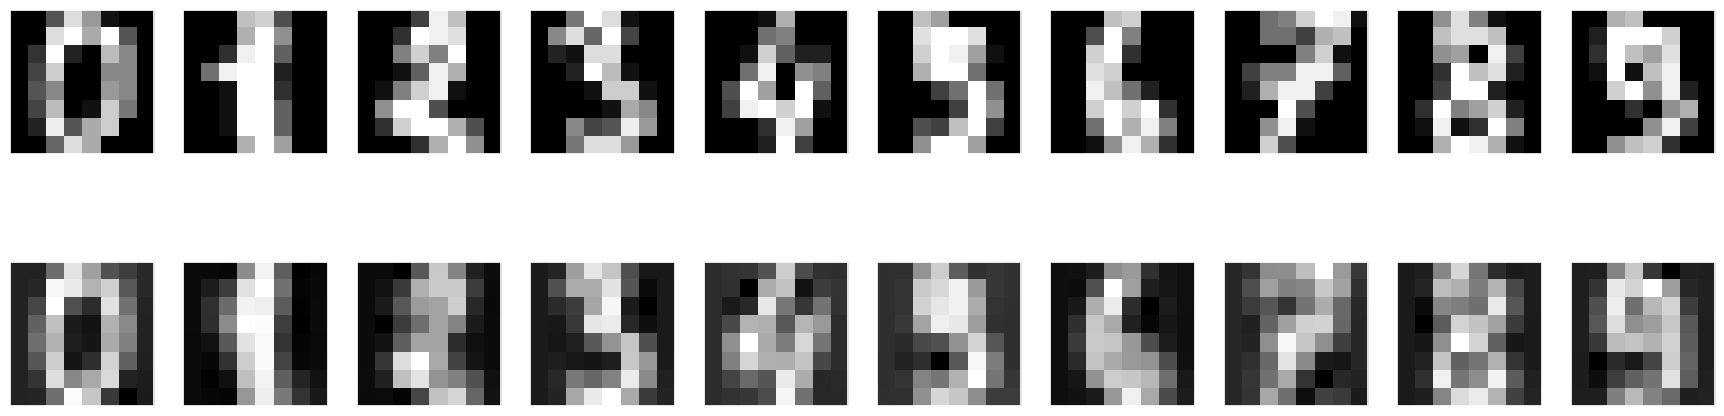

In [4]:
# Muestra de algunos ejemplos de digitos
fig, ax = plt.subplots(2, 10, figsize=(22, 6))
for i in range(10):
    ax[0, i].imshow(X[i].reshape((8, 8)), cmap='gray')
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    ax[1, i].imshow(pca.inverse_transform(digits_pca[i]).reshape((8, 8)), cmap='gray')
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])
plt.show()

Las reconstrucciones claramente han perdido información, pero los dígitos todavía son distinguibles. Ahora, verifiquemos la varianza total explicada sumando todos los valores del array explained_variance_ratio_, que contiene la cantidad relativa de varianza explicada para cada componente (de manera que la suma para cualquier cantidad de componentes $ k < n $ siempre es menor que 1):

0.8493974642542457


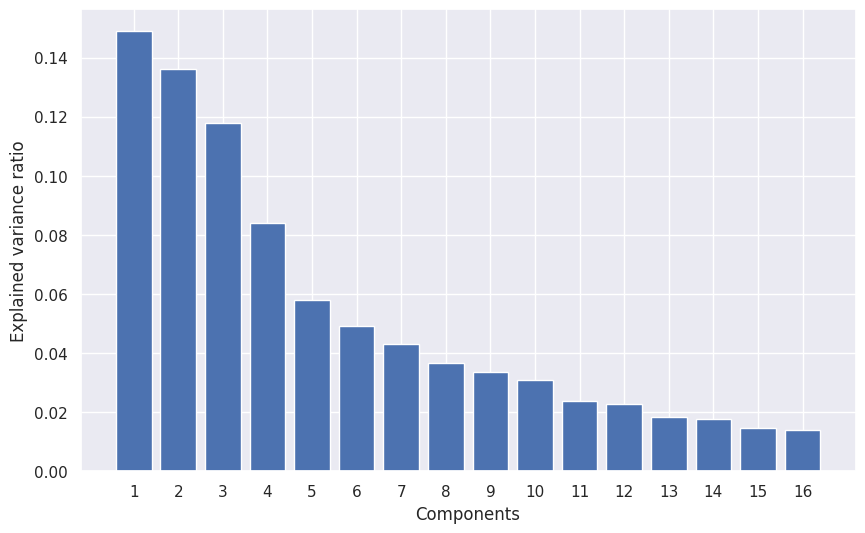

In [5]:
# Mostramos la varianza total explicada como ratio
print(np.sum(pca.explained_variance_ratio_))

# Muestra varianza explicada por cada componente (como ratio tambien)
ev = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(1, len(ev) + 1, 1), ev)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')
plt.show()

Como se esperaba, la contribución tiende a disminuir porque los primeros componentes principales son, en este caso, responsables, por ejemplo, del color de una línea (como negro o blanco), mientras que los restantes contribuyen a los tonos de gris. Este comportamiento es muy común y se observa en casi todos los casos. A través de este diagrama, también es fácil encontrar la pérdida adicional para una reducción adicional. Por ejemplo, podemos determinar inmediatamente que una limitación drástica a 3 componentes explicará aproximadamente el 40% de la varianza original; por lo tanto, el restante 45% se distribuye entre los 13 componentes restantes. Te invito a repetir este ejemplo, intentando encontrar el número mínimo de componentes necesarios para que una persona pueda distinguir todos los dígitos.